In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Machine Learning for Business II - Project**
##Business Use Case: Sentiment Analysis on a Disneyland dataset


## I - Exploratory Data Analysis (EDA)


In [2]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Import matplotlib.pyplot for creating visualizations and plots
import matplotlib.pyplot as plt


In [3]:
# Load the Excel file containing the Disney reviews dataset
df_disney_reviews = pd.read_excel("/content/drive/MyDrive/ML business - project/Dataset ML project - Disney Reviews.xlsx")

# Display the shape of the dataframe (rows, columns) to understand its size
df_disney_reviews.shape

# Display the first 6 rows of the dataframe to get an initial look at the data
df_disney_reviews.head(6)


,Review ID,Date,Rating,Name,New Name,Theme,Content,feeling cont
0,85922626,"Apr 8, 2024, 2:09:36 PM",2,La Petite Maison des Jouets,NaN,Guest Experience,Small gift shop which sells different styles o...,négatif
1,85922626,"Apr 8, 2024, 2:09:36 PM",2,La Petite Maison des Jouets,NaN,Prices,Small gift shop which sells different styles o...,négatif
2,86923987,"Apr 11, 2024, 10:46:51 AM",5,Disneyland Paris,NaN,Guest Experience,Great time with the kids,positif
3,85366876,"Apr 3, 2024, 4:24:22 PM",4,Parc Disneyland,NaN,Guest Experience,NaN,positif
4,85751171,"Apr 7, 2024, 9:38:20 AM",3,Parc Disneyland,NaN,Guest Experience,NaN,mitigé
5,87717711,"Apr 14, 2024, 2:16:28 PM",5,Parc Disneyland,NaN,Guest Experience,NaN,positif


In [4]:
print("Column Information")
# Display detailed information about the DataFrame, such as column names, data types, and the number of non-null entries in each column
df_disney_reviews.info()

Column Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review ID     2043 non-null   int64 
 1   Date          2043 non-null   object
 2   Rating        2043 non-null   int64 
 3   Name          2043 non-null   object
 4   New Name      69 non-null     object
 5   Theme         2043 non-null   object
 6   Content       1199 non-null   object
 7   feeling cont  1955 non-null   object
dtypes: int64(2), object(6)
memory usage: 127.8+ KB


In [15]:
# Display descriptive statistics for numerical columns with values rounded to 2 decimal places
df_disney_reviews.describe().round(0)


,Review ID,Rating
count,2043.0,2043.0
mean,86096874.0,4.0
std,1723262.0,1.0
min,34351416.0,1.0
25%,85542654.0,4.0
50%,85752299.0,5.0
75%,86926330.0,5.0
max,87800052.0,5.0


In [16]:
# Display the count of missing values in each column
df_disney_reviews.isnull().sum()

,0
Review ID,0
Date,0
Rating,0
Name,0
New Name,1974
Theme,0
Content,844
feeling cont,88


In [17]:
#Count of duplicates
#Count the number of duplicate rows in the entire DataFrame
print("Number of duplicate rows =", df_disney_reviews.duplicated().sum())

# Count the number of duplicate entries specifically in the 'Content' column (comment content)
print("Number of duplicate entries in the comment content =", df_disney_reviews.duplicated(subset="Content").sum())


Number of duplicate rows = 0
Number of duplicate entries in the comment content = 1512


Visualizing the distribution of labels


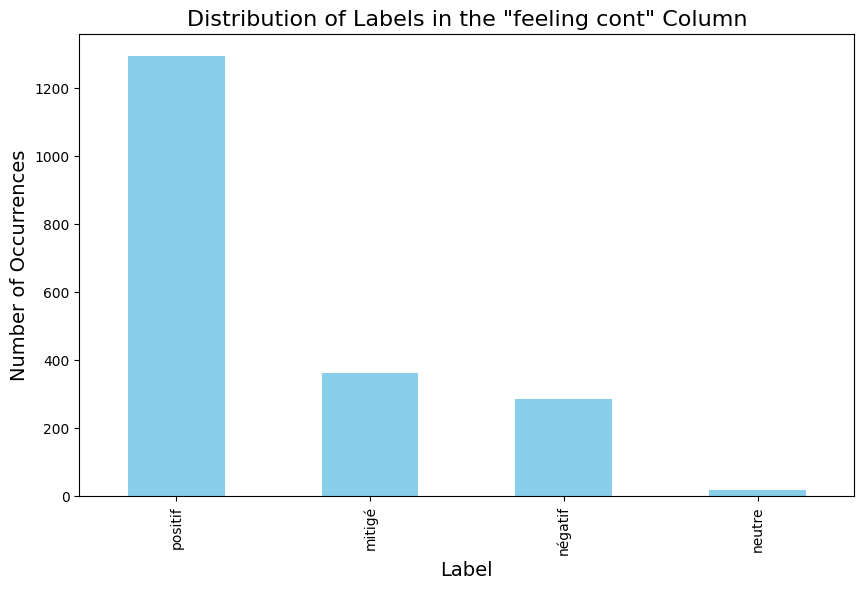

In [18]:
# Distribution of labels
label_counts = df_disney_reviews["feeling cont"].value_counts()

# Visualize the label distribution
print("Visualizing the distribution of labels")
plt.figure(figsize=(10,6))  # Set the figure size for the plot

# Create a bar plot showing the count of each label in the 'feeling cont' column
label_counts.plot(kind='bar', color='skyblue')

# Add a title and axis labels to the plot
plt.title('Distribution of Labels in the "feeling cont" Column', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=14)

# Display the plot
plt.show()


# II - Pre-processing

In [21]:
#Remove rows that have missing values in the'feeling cont' column
df_cleaned = df_disney_reviews.dropna(subset=["feeling cont"])

# Remove rows that have missing values in the 'Content' column (i.e., empty comments)
df_cleaned = df_cleaned.dropna(subset=["Content"])

# Remove duplicate rows based on the 'Content' column (to eliminate repeated comments)
df_cleaned = df_cleaned.drop_duplicates(subset=["Content"])

# Print the number of missing values and the shape of the cleaned dataset
print(df_cleaned.isnull().sum(), df_cleaned.shape)


Review ID         0
Date              0
Rating            0
Name              0
New Name        530
Theme             0
Content           0
feeling cont      0
dtype: int64 (530, 8)


In [22]:
# Change column types to more appropriate data types

# Convert the 'feeling cont' column (sentiment labels) to a categorical data type
df_cleaned['feeling cont'] = df_disney_reviews['feeling cont'].astype('category')

# Convert several columns (Review ID, Rating, Name, New Name, Theme, Content) to string data type
df_cleaned[['Review ID', 'Rating', 'Name', 'New Name', 'Theme', 'Content']] = df_disney_reviews[['Review ID', 'Rating', 'Name', 'New Name', 'Theme', 'Content']].astype('string')

# Convert the 'Date' column to a datetime object using a specific format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], format='%b %d, %Y, %I:%M:%S %p')

# Check if the type conversions were done correctly
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 530 entries, 0 to 2042
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Review ID     530 non-null    string        
 1   Date          530 non-null    datetime64[ns]
 2   Rating        530 non-null    string        
 3   Name          530 non-null    string        
 4   New Name      0 non-null      string        
 5   Theme         530 non-null    string        
 6   Content       530 non-null    string        
 7   feeling cont  530 non-null    category      
dtypes: category(1), datetime64[ns](1), string(6)
memory usage: 33.8 KB


In [25]:
# Reorder the rows of the DataFrame by the 'Date' column in ascending order (oldest to newest)
df_cleaned.sort_values(by='Date', ascending=True, inplace=True)

df_cleaned.head(6)

,Review ID,Date,Rating,Name,New Name,Theme,Content,feeling cont
1795,85270734,2024-04-01 00:19:45,4,Disneyland Paris,<NA>,Prices,A beautiful place - right at the entrance the...,mitigé
1820,85270755,2024-04-01 00:32:33,5,Parc Disneyland,<NA>,Comfort,"Very welcoming, magical place for children!",positif
279,84848130,2024-04-01 00:51:17,4,Disneyland Paris,<NA>,Prices,Expensive but the kids really enjoy it,mitigé
659,85246251,2024-04-01 06:09:27,4,Disneyland Paris,<NA>,Guest Experience,What you'd expect from Disneyland. It could do...,négatif
93,85271321,2024-04-01 06:20:39,5,Parc Disneyland,<NA>,Cleanliness,"Very clean park, the thrill rides are really ...",mitigé
261,85271323,2024-04-01 06:20:58,5,Disneyland Paris,<NA>,Atmosphere / Immersion,"A dream came true, very beautiful park. Food ...",mitigé


Visualizing the distribution of labels


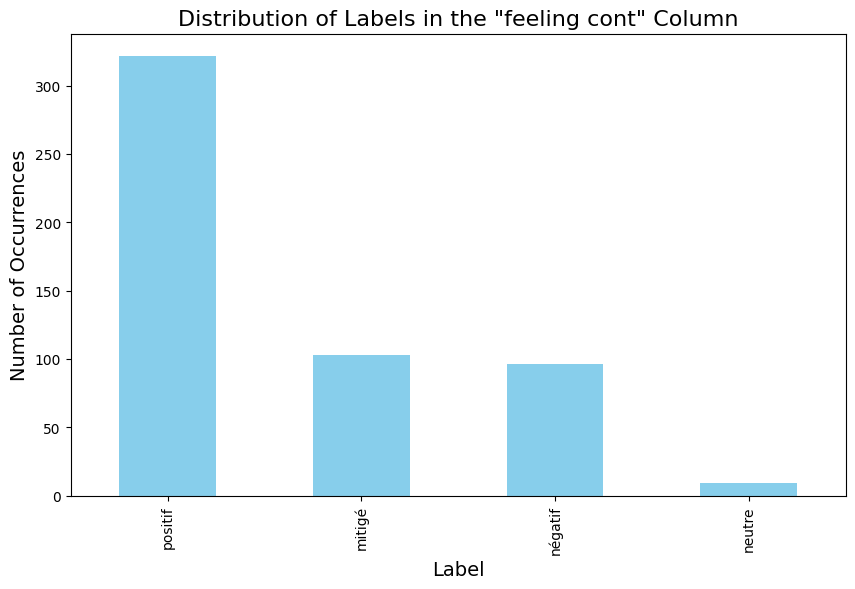

In [26]:
# Distribution of labels after preprocessing
label_counts = df_cleaned["feeling cont"].value_counts()

# Visualize the distribution of labels
print("Visualizing the distribution of labels")
plt.figure(figsize=(10,6))  # Set the figure size for the plot

# Create a bar plot showing the count of each label in the 'feeling cont' column
label_counts.plot(kind='bar', color='skyblue')

# Add a title and axis labels to the plot
plt.title('Distribution of Labels in the "feeling cont" Column', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=14)

# Display the plot
plt.show()


In [27]:
#AutoTokenizer: This class from the Hugging Face Transformers library automatically loads the appropriate tokenizer for the specified model.
#The tokenizer is used to convert raw text into tokens (numeric representations) that the BERT model can understand.
from transformers import AutoTokenizer

# Load a pre-trained BERT tokenizer (uncased version)
#from_pretrained('bert-base-uncased'): This loads a pre-trained BERT tokenizer that is "uncased," meaning it converts all input text to lowercase before tokenizing.
# It's useful for tasks where the case (uppercase or lowercase) of the input text doesn't matter.
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


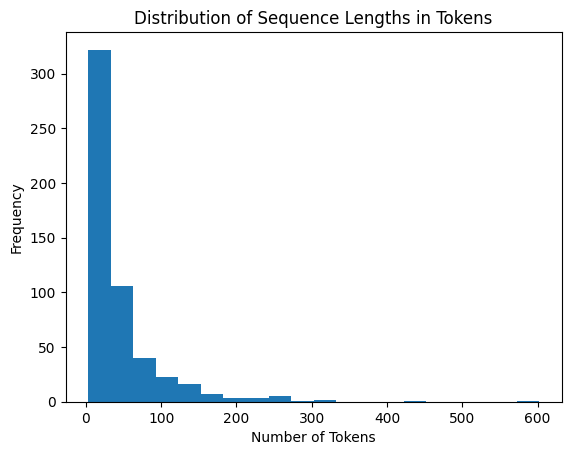

Maximum length: 602
Average length: 42.5
Median length: 24


In [30]:
# Extract the 'Content' column (text) from the cleaned DataFrame
texte = df_cleaned["Content"]

# Tokenize each text without truncation or padding
tokenized = [tokenizer(text, truncation=False, padding=False) for text in texte]

# Calculate the length of each tokenized sequence (number of tokens per sequence)
lengths = [len(t['input_ids']) for t in tokenized]

# Display the distribution of sequence lengths using a histogram
plt.hist(lengths, bins=20)  # Bins define the number of intervals in the histogram
plt.title('Distribution of Sequence Lengths in Tokens')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()

# Calculate and display the maximum, average, and median length of tokenized sequences
max_length = max(lengths)
avg_length = round(sum(lengths) / len(lengths), 1)  # Round the average to 2 decimal places
median_length = round(sorted(lengths)[len(lengths)//2], 1)  # Round the median to 2 decimal places

print(f"Maximum length: {max_length}")
print(f"Average length: {avg_length}")
print(f"Median length: {median_length}")



In [31]:
# Save the cleaned DataFrame to an Excel file
df_cleaned.to_excel("/content/drive/MyDrive/ML business - project/Dataset ML project - Disney Reviews - Cleaned.xlsx", index=False)
